<a href="https://colab.research.google.com/github/supercode01/Minist-dataset_codealpha/blob/main/CNN_Mnist_emnist_Dataset_CodeAlpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(y_train_mnist)

[5 0 4 ... 5 6 8]


In [ ]:
print(y_test_mnist)

[7 2 1 ... 4 5 6]


In [ ]:
x_train_mnist = x_train_mnist/255

In [ ]:
x_test_mnist = x_test_mnist/255

In [ ]:
print(x_train_mnist.shape)

(60000, 28, 28)


In [ ]:
print(x_test_mnist.shape)

(10000, 28, 28)


Total images in mnist dataset is 70k. Every image consist of 28 rows and 28 column of 2D array

In [ ]:
# No of total images in mnist dataset not by shape

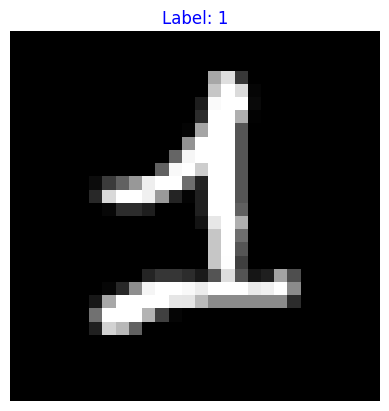

In [ ]:
plt.imshow(x_train_mnist[24], cmap = "gray")
# plt.title(y_train_mnist[0])
plt.title(f"Label: {y_train_mnist[24]}", color = 'blue');
ax = plt.gca()  # current axes le aata hai
ax.set_facecolor("lightblue")  # axes bg change
plt.axis("off");
# plt.show()
plt.savefig("mnist.png")

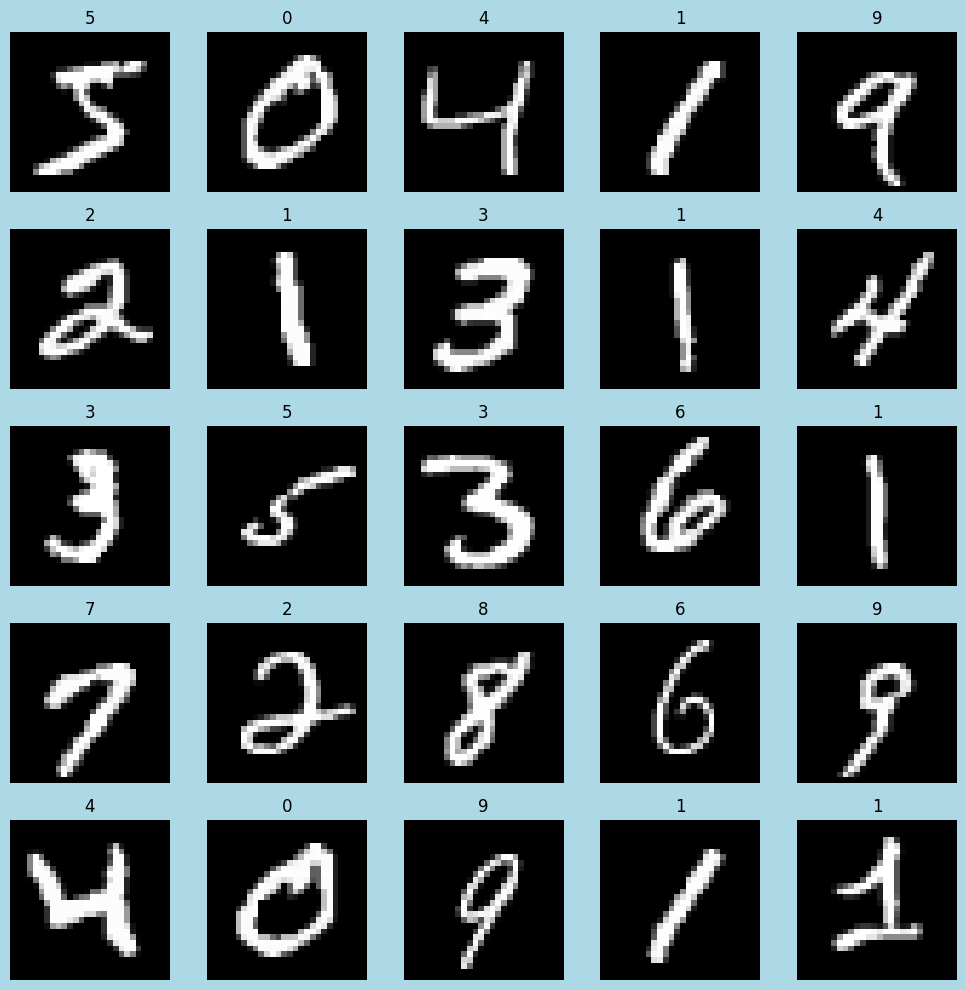

In [ ]:
# Set up the grid: 5 rows × 5 columns
plt.figure(figsize=(10, 10), facecolor='lightblue')

for i in range(25):  # Show first 25 images
    plt.subplot(5, 5, i + 1)           # Plot in 5x5 grid
    plt.imshow(x_train_mnist[i], cmap='gray')  # Show image
    plt.title(f"{y_train_mnist[i]}", fontsize=12)  # Show label
    plt.axis('off')                   # Hide axes

plt.tight_layout()  # Adjust spacing
plt.savefig("mnist_canvas.png")
plt.show()

In [ ]:
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1)

In [ ]:
print(x_train_mnist.shape)
print(x_test_mnist.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation= "relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train_mnist, y_train_mnist, epochs = 5, batch_size= 32 ,validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8937 - loss: 0.3513 - val_accuracy: 0.9792 - val_loss: 0.0681
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9834 - loss: 0.0526 - val_accuracy: 0.9838 - val_loss: 0.0534
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9897 - loss: 0.0347 - val_accuracy: 0.9880 - val_loss: 0.0416
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9919 - loss: 0.0242 - val_accuracy: 0.9888 - val_loss: 0.0375
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9947 - loss: 0.0193 - val_accuracy: 0.9896 - val_loss: 0.0384


**validation_data** is use for testing the model.

**validation_split** is use to split the training data.

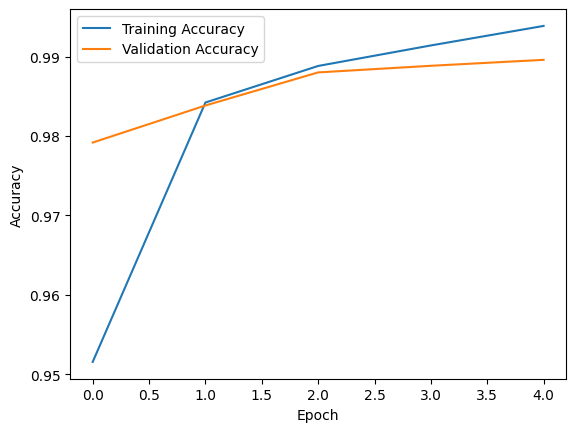

In [ ]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('mnist_accuracy.png')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_mnist, y_test_mnist)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9865 - loss: 0.0370
Test Accuracy: 0.9890
Test Loss: 0.0312


In [ ]:
index = 2
image = x_test_mnist[index]

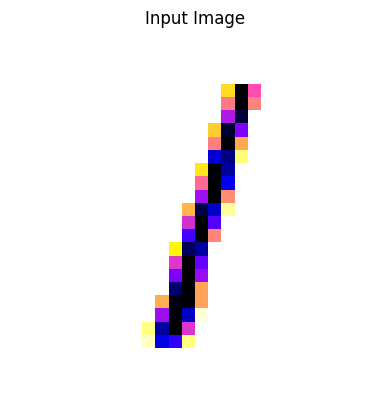

In [ ]:
# Show the image
plt.imshow(image, cmap='gnuplot2_r')
plt.title("Input Image")
plt.axis('off')
plt.show()

In [ ]:
image_reshaped = image.reshape(1, 28, 28)

In [ ]:
import numpy as np
predicted_probabilities = model.predict(image_reshaped)
predicted_class = np.argmax(predicted_probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [ ]:
print(f"Predicted digit: {predicted_class}")

Predicted digit: 1


In [ ]:
true_label = np.argmax(y_test_mnist[index])

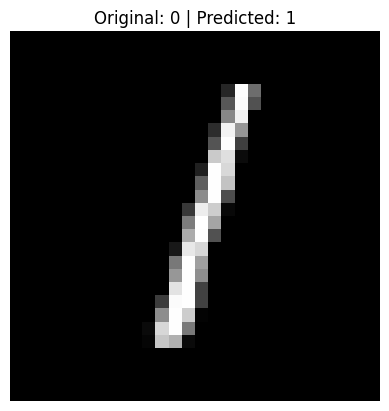

In [ ]:
# compairing orignal pic with prediction
plt.imshow(image, cmap='grey')
plt.title(f"Original: {true_label} | Predicted: {predicted_class}")
plt.axis('off')
plt.show()

## Emnist Dataset ##

In [ ]:
!pip install extra-keras-datasets

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.HLQYVY_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.HLQYVY_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.


In [ ]:
ds_info = tfds.builder("emnist/balanced").info
label_names = ds_info.features["label"].names  # class index -> string mapping

print("Total classes:", len(label_names))
print("Example:", list(enumerate(label_names[:20])))

Total classes: 47
Example: [(0, '0'), (1, '1'), (2, '2'), (3, '3'), (4, '4'), (5, '5'), (6, '6'), (7, '7'), (8, '8'), (9, '9'), (10, '10'), (11, '11'), (12, '12'), (13, '13'), (14, '14'), (15, '15'), (16, '16'), (17, '17'), (18, '18'), (19, '19')]


In [ ]:
num_classes = ds_info.features['label'].num_classes
print("Number of classes:", num_classes)

Number of classes: 47


In [ ]:
import numpy as np

In [ ]:
def to_numpy(ds):
    images, labels = [], []
    for img, lbl in tfds.as_numpy(ds):
        images.append(img)
        labels.append(lbl)
    return np.array(images), np.array(labels)

In [ ]:
x_train_emnist, y_train_emnist = to_numpy(ds_train)
x_test_emnist, y_test_emnist = to_numpy(ds_test)

In [ ]:
print(x_train_emnist.shape, y_train_emnist.shape)

(112800, 28, 28, 1) (112800,)


In [ ]:
print(x_test_emnist.shape, y_test_emnist.shape)

(18800, 28, 28, 1) (18800,)


In [ ]:
x_train_emnist = x_train_emnist/255

In [ ]:
x_test_emnist = x_test_emnist/255

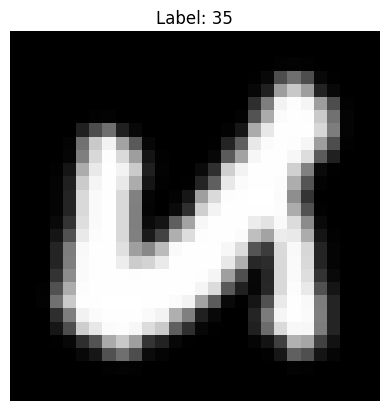

In [ ]:
plt.imshow(x_train_emnist[1], cmap = "gray")
plt.title(f"Label: {y_train_emnist[1]}");
plt.axis("off");
plt.savefig("mnist.png")

In [ ]:
x_train_emnist = x_train_emnist.reshape(-1, 28, 28, 1)
x_test_emnist = x_test_emnist.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation= "relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(47, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train_emnist, y_train_emnist, epochs = 5, batch_size= 32 ,validation_split = 0.2)

Epoch 1/5
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 94s 33ms/step - accuracy: 0.6289 - loss: 1.3028 - val_accuracy: 0.8339 - val_loss: 0.5023
Epoch 2/5
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 92s 33ms/step - accuracy: 0.8467 - loss: 0.4586 - val_accuracy: 0.8495 - val_loss: 0.4306
Epoch 3/5
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 145s 34ms/step - accuracy: 0.8647 - loss: 0.3899 - val_accuracy: 0.8573 - val_loss: 0.3972
Epoch 4/5
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 136s 31ms/step - accuracy: 0.8770 - loss: 0.3415 - val_accuracy: 0.8674 - val_loss: 0.3776
Epoch 5/5
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 95s 34ms/step - accuracy: 0.8878 - loss: 0.3091 - val_accuracy: 0.8650 - val_loss: 0.3917


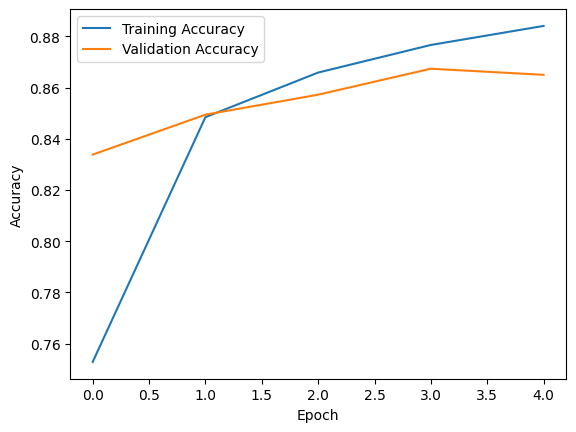

In [ ]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('emnist_accuracy.png')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test_emnist, y_test_emnist, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.8599467873573303


In [ ]:
y_pred = model.predict(x_test_emnist)

# probability vector
print("First sample probabilities:", y_pred[0])

588/588 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
First sample probabilities: [6.40907267e-04 9.65019531e-09 3.06574220e-05 1.05586084e-09
 1.01282005e-08 9.70902079e-08 1.30035520e-08 2.70772365e-08
 1.11346284e-03 3.49513278e-03 4.18236414e-05 3.78649893e-05
 1.71148756e-07 2.22763811e-06 4.28705334e-07 1.27920412e-08
 1.09951077e-04 3.57144252e-08 5.63591591e-08 9.09988103e-07
 2.43688287e-08 2.22498713e-07 4.62575663e-05 5.60654144e-07
 5.26241784e-04 1.21313972e-08 2.76406412e-03 1.12704351e-04
 1.43121298e-07 4.24943369e-09 8.65955808e-05 1.40733656e-08
 1.57253442e-06 3.53363504e-07 2.29515607e-07 3.92007996e-06
 5.27571201e-01 1.61115611e-06 6.44217289e-06 3.10771939e-05
 9.28224182e-08 1.63991302e-01 1.90983414e-07 3.02988221e-04
 2.99076200e-01 2.07124299e-06 2.98120746e-08]


In [ ]:
pred_label = np.argmax(y_pred[0])
print("Predicted Label:", pred_label)

Predicted Label: 36


In [ ]:
true_label = np.argmax(y_test_emnist[0])   # agar one-hot encoded hai
print("True Label:", true_label)

True Label: 0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


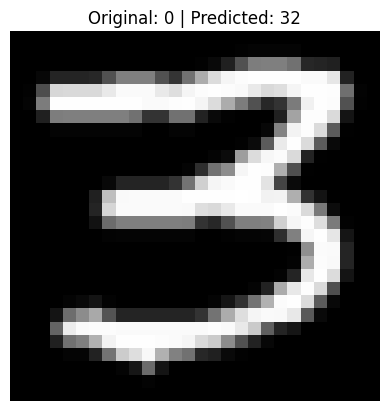

In [ ]:
idx = np.random.randint(0, len(x_test_emnist))

# ek image aur uska label
image = x_test_emnist[idx]
true_label = np.argmax(y_test_emnist[idx])   # agar one-hot hai
# true_label = y_test[idx]            # agar one-hot nahi hai

# prediction
y_pred = model.predict(image.reshape(1, 28, 28, 1))   # 1 sample ke liye reshape
pred_label = np.argmax(y_pred)

# show image with labels
plt.imshow(image.squeeze(), cmap='gray')  # squeeze se extra dim hat jati h
plt.title(f"Original: {true_label} | Predicted: {pred_label}")
plt.axis('off')
plt.show()